In [188]:
from read_datasetBreakfast import load_data, read_mapping_dict
import os
import torch
import seaborn as sn

COMP_PATH = 'C:/Users/moong/Desktop/CS5242 Project/'
''' 
training to load train set
test to load test set
'''
split = 'training'
#split = 'test'
train_split =  os.path.join(COMP_PATH, 'splits/train.split1.bundle') #Train Split
test_split  =  os.path.join(COMP_PATH, 'splits/test.split1.bundle') #Test Split
GT_folder   =  os.path.join(COMP_PATH, 'groundTruth/') #Ground Truth Labels for each training video 
DATA_folder =  os.path.join(COMP_PATH, 'data/') #Frame I3D features for all videos
mapping_loc =  os.path.join(COMP_PATH, 'splits/mapping_bf.txt') 

actions_dict = read_mapping_dict(mapping_loc)
if  split == 'training':
    data_feat_train, data_labels = load_data(train_split, actions_dict, GT_folder, DATA_folder, datatype = split) #Get features and labels
if  split == 'test':
    data_feat_test = load_data(test_split, actions_dict, GT_folder, DATA_folder, datatype = split) #Get features only

#'''
#Write Code Below
#Pointers
#Need to load the segments.txt file for segments for test videos 
#Output the CSV in correct format as shown in Evaluation Section
#Id corresponds to the segments in order. 
#Example - 30-150 = Id 0
#          150-428 = Id 1
#          428-575 = Id 2
#Category is the Class of the Predicted Action
#'''

KeyboardInterrupt: 

In [189]:
print("Number of Training Data: {}".format(len(data_feat_train)))
print("Number of Training Data: {}".format(len(data_labels)))
print("Number of Test Data: {}".format(len(data_feat_test)))
print("% of Training Data: {}".format(len(data_feat_test)/(len(data_feat_train)+len(data_feat_test))*100))

Number of Training Data: 1460
Number of Training Data: 1460
Number of Test Data: 252
% of Training Data: 14.719626168224298


In [190]:
import pandas as pd
#check for labels class balance
labels_df = pd.DataFrame(data_labels)

labels_df = pd.DataFrame(labels_df.unstack(level=0)).reset_index()
labels_df.drop('level_0',inplace=True,axis=1)
labels_df.dropna(inplace=True)
labels_df.columns =['sample_no','cat']
labels_df['cat'] = labels_df['cat'].astype(int)


#mapping for actions (change keys and values)
actions_dict = {y:x for x,y in actions_dict.items()}

In [191]:
#wrangle DF
labels_df['cat_name'] = labels_df['cat'].map(actions_dict)
labels_df

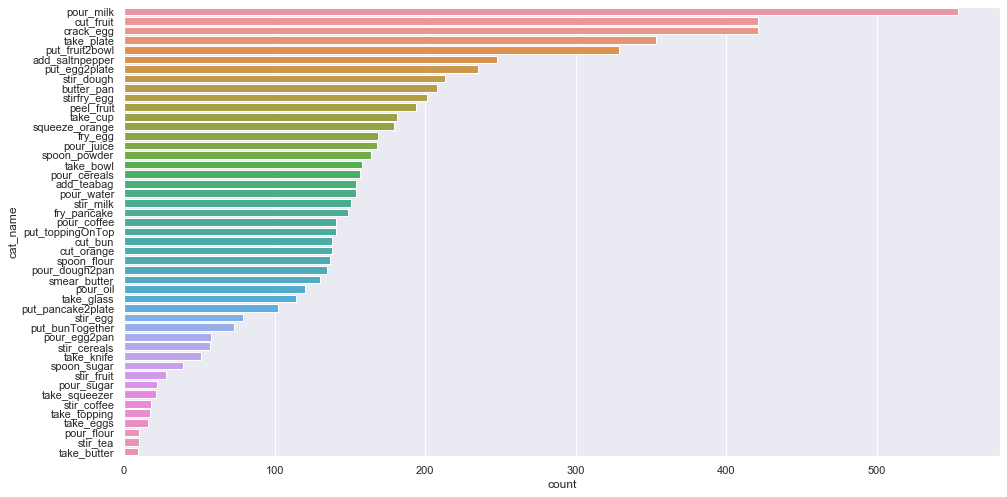

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

%matplotlib inline
sns.set(rc={'figure.figsize':(15.7,8.27)})

sns.countplot(y= 'cat_name',orient= 'h',data=labels_df,order = labels_df['cat_name'].value_counts().index)
plt.show()

#note: no. of time each category appear

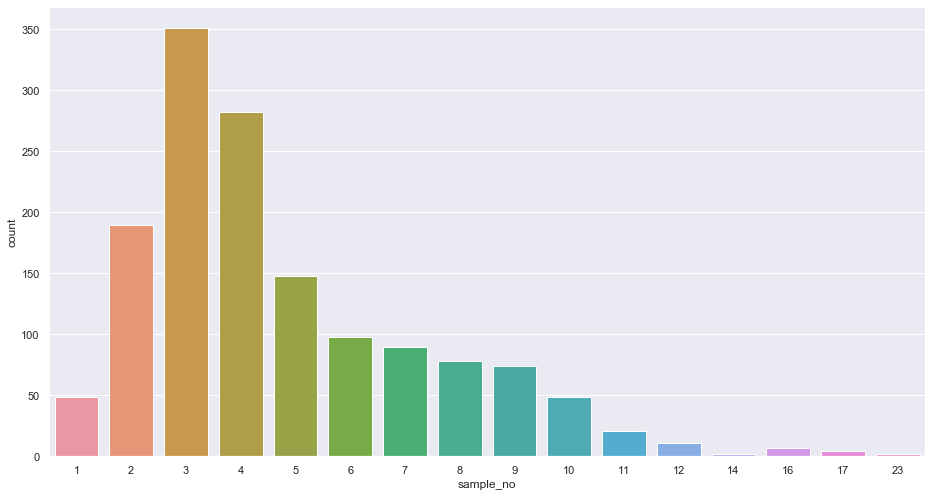

In [229]:
sns.countplot(labels_df['sample_no'].value_counts())
#note: Breakdown by no.of category to predict in videos

In [254]:
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
import torch
import torchvision.utils

In [310]:
list_frame_no=[]
for x in data_feat_train:
    len_frame = len(x)
    list_frame_no.append(len_frame)

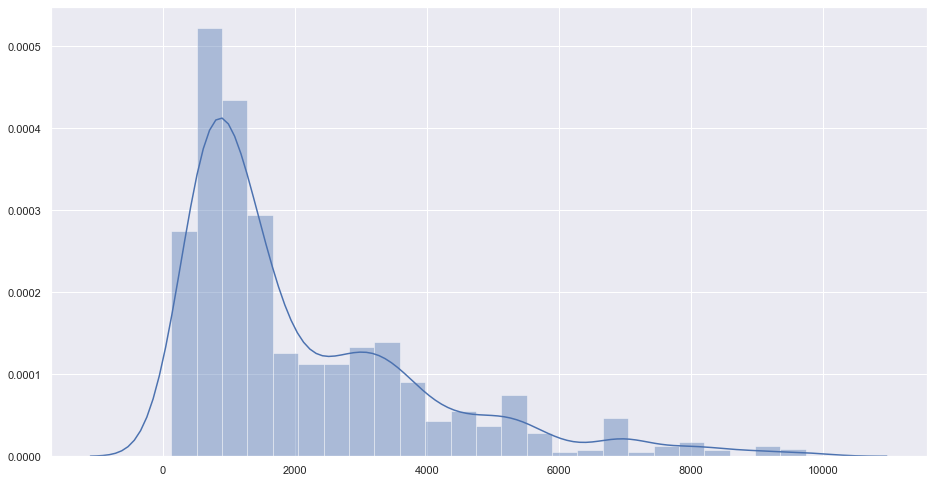

In [313]:
sns.distplot(list_frame_no)
#note: Distribution of no.of frames per video

In [331]:
def get_frame_breakdown(filename):
    gt_file_level = pd.read_csv(COMP_PATH+'/groundTruth/'+filename,header=None)
    gt_file_level['file_name'] = filename
    gt_file_level.columns=['cat_frame','file_name']
    return gt_file_level

In [342]:
gt_frame_overall = pd.DataFrame()
actions_dict2 = {y:x for x,y in actions_dict.items()}

for filesname in os.listdir(COMP_PATH+'/groundTruth'):
    inital_df = get_frame_breakdown(filesname)
    gt_frame_overall = pd.concat([gt_frame_overall,inital_df], sort=False)
    

In [399]:
gt_frame_overall['cat_no'] = gt_frame_overall['cat_frame'].map(actions_dict2)
gt_frame_overall

,cat_frame,file_name,cat_no
0,SIL,P16_cam01_P16_cereals.txt,0
1,SIL,P16_cam01_P16_cereals.txt,0
2,SIL,P16_cam01_P16_cereals.txt,0
3,SIL,P16_cam01_P16_cereals.txt,0
4,SIL,P16_cam01_P16_cereals.txt,0
...,...,...,...
964,SIL,P54_webcam02_P54_tea.txt,0
965,SIL,P54_webcam02_P54_tea.txt,0
966,SIL,P54_webcam02_P54_tea.txt,0
967,SIL,P54_webcam02_P54_tea.txt,0


In [401]:
frame_level_df = gt_frame_overall.groupby(['file_name','cat_frame','cat_no']).size().reset_index().rename(columns={0:'count_frame'})
frame_level_df.describe()

,cat_no,count_frame
count,7591.000000,7591.000000
mean,16.267158,406.465156
std,14.386506,601.094575
min,0.000000,2.000000
25%,2.000000,118.000000
50%,14.000000,213.000000
75%,27.000000,395.000000
max,47.000000,5791.000000


In [403]:
df_median = frame_level_df.groupby(['cat_frame','cat_no']).median().reset_index()

<Figure size 10800x720 with 0 Axes>

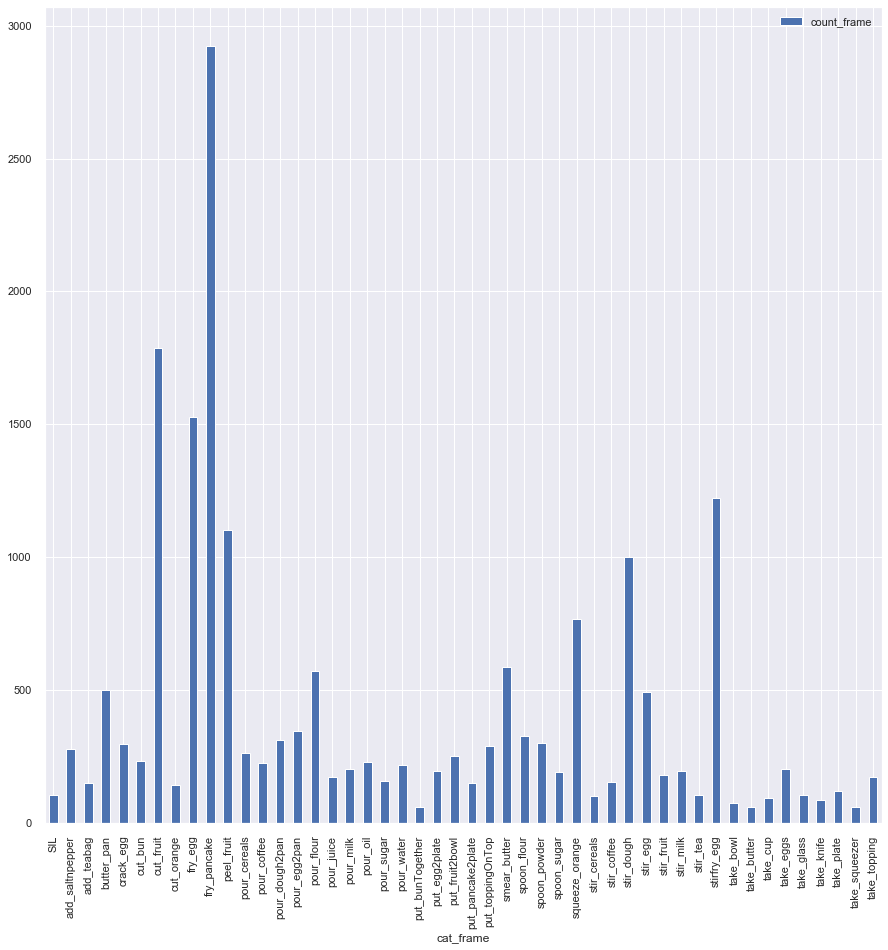

In [404]:
plt.figure(figsize=(150,10))
df_median.plot.bar(x='cat_frame', y='count_frame',figsize=(15,15), sort_columns =True) 

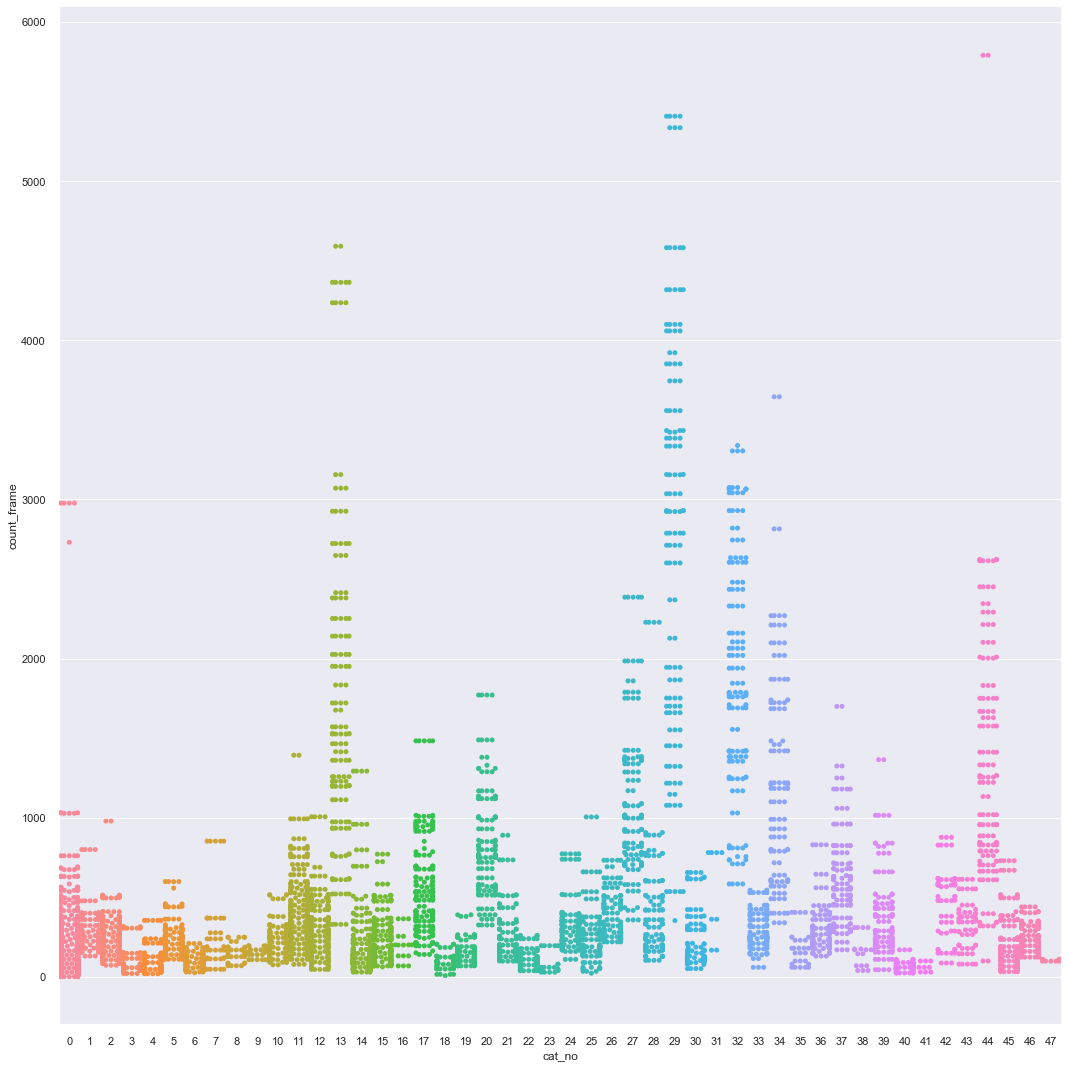

In [408]:
sns.catplot(x="cat_no", y="count_frame", data=frame_level_df,height=15, kind="swarm")

In [407]:
actions_dict2

{'SIL': 0,
 'pour_cereals': 1,
 'pour_milk': 2,
 'stir_cereals': 3,
 'take_bowl': 4,
 'pour_coffee': 5,
 'take_cup': 6,
 'spoon_sugar': 7,
 'stir_coffee': 8,
 'pour_sugar': 9,
 'pour_oil': 10,
 'crack_egg': 11,
 'add_saltnpepper': 12,
 'fry_egg': 13,
 'take_plate': 14,
 'put_egg2plate': 15,
 'take_eggs': 16,
 'butter_pan': 17,
 'take_knife': 18,
 'cut_orange': 19,
 'squeeze_orange': 20,
 'pour_juice': 21,
 'take_glass': 22,
 'take_squeezer': 23,
 'spoon_powder': 24,
 'stir_milk': 25,
 'spoon_flour': 26,
 'stir_dough': 27,
 'pour_dough2pan': 28,
 'fry_pancake': 29,
 'put_pancake2plate': 30,
 'pour_flour': 31,
 'cut_fruit': 32,
 'put_fruit2bowl': 33,
 'peel_fruit': 34,
 'stir_fruit': 35,
 'cut_bun': 36,
 'smear_butter': 37,
 'take_topping': 38,
 'put_toppingOnTop': 39,
 'put_bunTogether': 40,
 'take_butter': 41,
 'stir_egg': 42,
 'pour_egg2pan': 43,
 'stirfry_egg': 44,
 'add_teabag': 45,
 'pour_water': 46,
 'stir_tea': 47}

In [410]:
#things to do: try to load the image

In [433]:
from sklearn.feature_extraction.text import CountVectorizer

In [528]:
seq = labels_df.groupby(['sample_no'])['cat_name'].apply(list).reset_index()
seq['cat_name'] = [' '.join(x) for x in seq['cat_name']] 
vectorizer = CountVectorizer(ngram_range=(2,5))
X = vectorizer.fit_transform(seq['cat_name'])
final_data = pd.DataFrame(X.toarray().sum(axis=0)  )
final_data['name'] = vectorizer.get_feature_names()

In [536]:
final_data.sort_values([0],ascending = False)

,0,name
278,273,cut_fruit put_fruit2bowl
335,175,peel_fruit cut_fruit
358,152,pour_cereals pour_milk
532,147,put_fruit2bowl cut_fruit
918,133,take_plate put_egg2plate
...,...,...
67,2,butter_pan crack_egg add_saltnpepper take_plate
237,2,crack_egg stirfry_egg add_saltnpepper take_pla...
236,2,crack_egg stirfry_egg add_saltnpepper take_plate
568,2,spoon_flour butter_pan pour_milk stir_dough bu...


In [543]:
bag = labels_df.drop_duplicates().sort_values(['sample_no','cat_name'])
bag = bag.groupby(['sample_no'])['cat_name'].apply(list).reset_index()
bag['cat_name'] = [' '.join(x) for x in bag['cat_name']] 
vectorizer2 = CountVectorizer(ngram_range=(2,5))
X = vectorizer2.fit_transform(bag['cat_name'])
final_data2 = pd.DataFrame(X.toarray().sum(axis=0)  )
final_data2['name'] = vectorizer2.get_feature_names()

In [544]:
final_data2.sort_values([0],ascending = False)

,0,name
40,202,butter_pan crack_egg
272,154,pour_milk spoon_powder
186,152,pour_cereals pour_milk
34,150,add_teabag pour_water
63,145,crack_egg fry_egg
...,...,...
62,1,butter_pan crack_egg stirfry_egg take_eggs tak...
61,1,butter_pan crack_egg stirfry_egg take_eggs
105,1,crack_egg stirfry_egg take_eggs
106,1,crack_egg stirfry_egg take_eggs take_plate
